Goal:Analyze and visualize retail sales data to uncover insights on product performance, regional trends, and customer behavior — and build an interactive Tableau dashboard to present findings.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

down load the sample daa set from https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

In [8]:
df = pd.read_csv("Sample_Superstore.csv", encoding = 'latin1')
print(df.head()) ## preview of data set


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
#count NaN values per column
print(df.isna().sum().sum())


0


In [13]:
#totla num of duplicaes
print(df.duplicated().sum())

0


In [9]:
## Clean and Prepare data

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df = df.dropna()

# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Add new calculated columns
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

# Check final dataset
print(df.describe())


            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  Profit Margin         Year  
count  9994.000000    9994.000000  9994.000000  
mean     28.656896       0.120314  2015.722233  
std     234.260108       0.466754     1.123555  
min   -6599.978000      -2.750000  2014.000000  
25%       1.728750       0.075000  2015.000000  
50%       8.666500   

In [15]:
##Exploratory Data Analysis (EDA)

In [17]:
#a Total sales and Profit by Region
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending = False)
print(region_sales)

               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


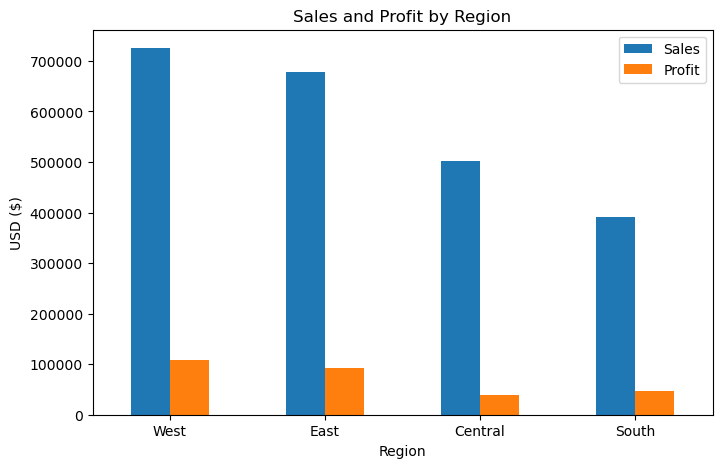

In [19]:
region_sales.plot(kind='bar', figsize=(8,5))
plt.title('Sales and Profit by Region')
plt.ylabel('USD ($)')
plt.xticks(rotation=0)
plt.show()

                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


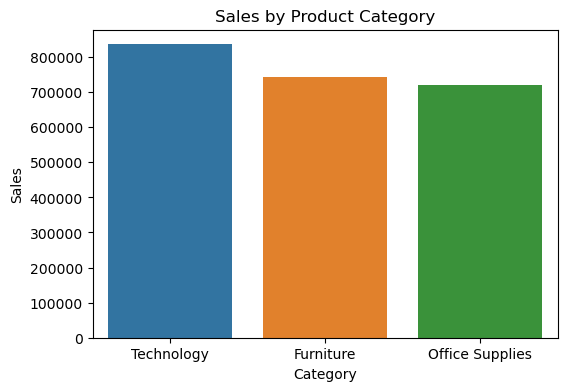

In [20]:
# b. Category and Sub-Catebury Analysis
category = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
print(category)

plt.figure(figsize=(6,4))
sns.barplot(x=category.index, y=category['Sales'])
plt.title('Sales by Product Category')
plt.show()


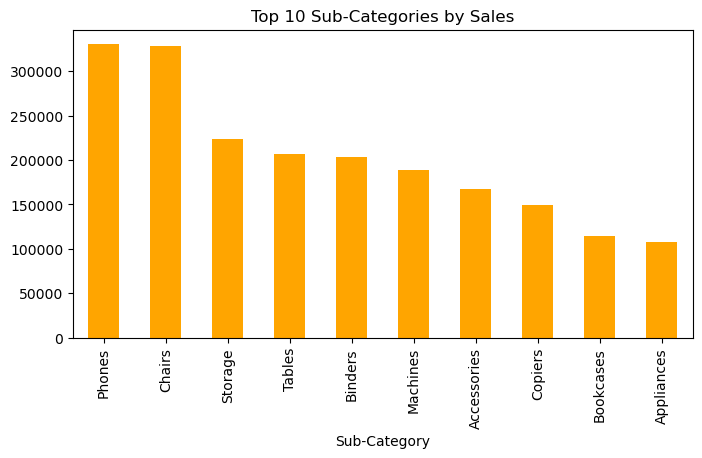

In [21]:
subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
subcat.plot(kind='bar', color='orange', figsize=(8,4))
plt.title('Top 10 Sub-Categories by Sales')
plt.show()


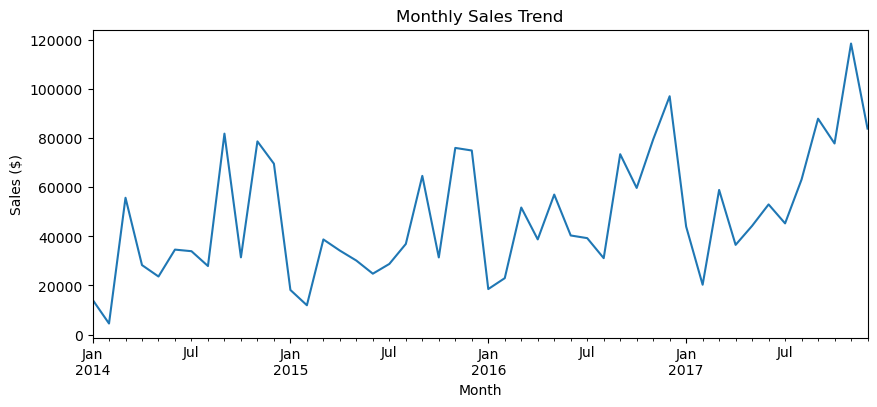

In [22]:
# c. Monthly Sales Trend

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(figsize=(10,4))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()


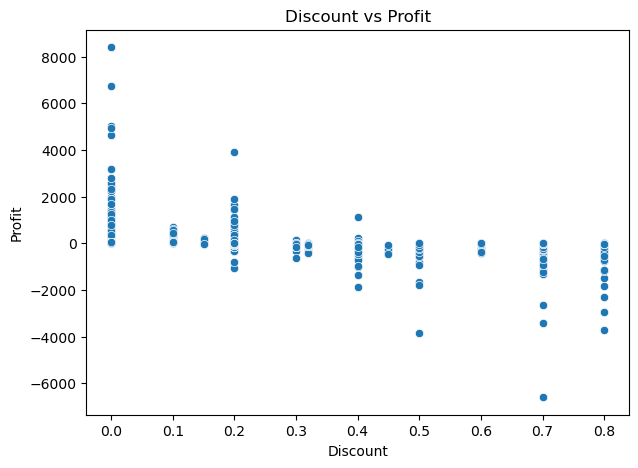

In [23]:
#d. Discount Impact on Profit
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show()


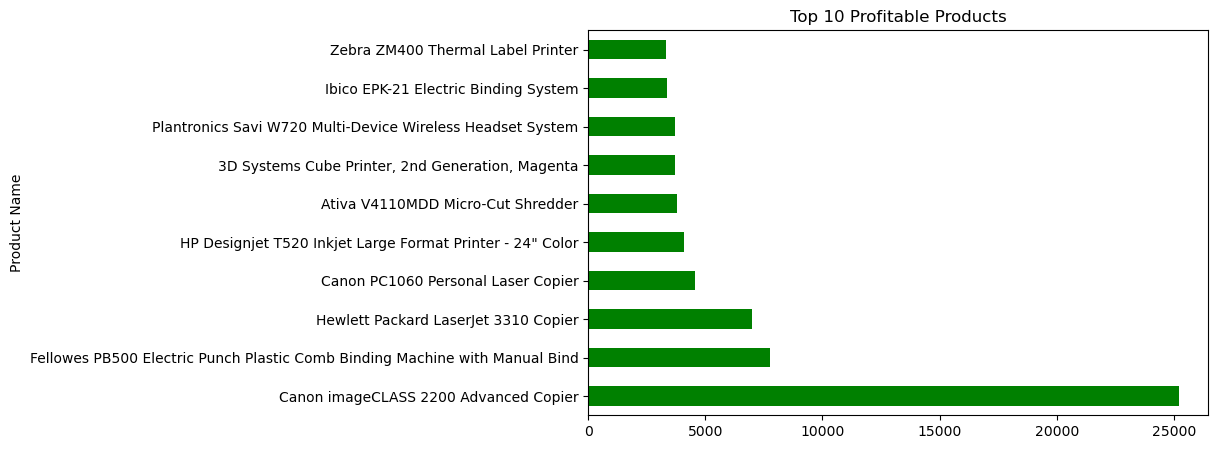

In [24]:
#e. Top 10 Products by Profit
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', color='green', figsize=(8,5))
plt.title('Top 10 Profitable Products')
plt.show()


In [25]:
#5.Export Cleaned Data for Tableau
df.to_csv('cleaned_superstore.csv', index=False)
print("✅ Cleaned dataset saved as 'cleaned_superstore.csv'")


✅ Cleaned dataset saved as 'cleaned_superstore.csv'
